Følger youtube vid; vente med EDA til datasettene slås sammen

In [72]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [73]:
receivals = pd.read_csv('/home/celinaha/ml_group21/data/kernel/receivals.csv')

In [74]:
(receivals.select_dtypes(include=['number'])<0).any()

rm_id                     False
product_id                False
purchase_order_id         False
purchase_order_item_no    False
receival_item_no          False
batch_id                  False
net_weight                False
supplier_id               False
dtype: bool

1. Sanity check of data

In [75]:
# Shape
receivals.shape

(122590, 10)

In [76]:
receivals.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 122590 entries, 0 to 122589
Data columns (total 10 columns):
 #   Column                  Non-Null Count   Dtype  
---  ------                  --------------   -----  
 0   rm_id                   122533 non-null  float64
 1   product_id              122533 non-null  float64
 2   purchase_order_id       122537 non-null  float64
 3   purchase_order_item_no  122537 non-null  float64
 4   receival_item_no        122590 non-null  int64  
 5   batch_id                64765 non-null   float64
 6   date_arrival            122590 non-null  object 
 7   receival_status         122590 non-null  object 
 8   net_weight              122522 non-null  float64
 9   supplier_id             122590 non-null  int64  
dtypes: float64(6), int64(2), object(2)
memory usage: 9.4+ MB


Kun receival_item_no, date_arrival, receival_status og supplier_id har fulltallieg rader

In [77]:
# missing values:
receivals.isnull().sum()

rm_id                        57
product_id                   57
purchase_order_id            53
purchase_order_item_no       53
receival_item_no              0
batch_id                  57825
date_arrival                  0
receival_status               0
net_weight                   68
supplier_id                   0
dtype: int64

In [78]:
# prosentandel i hver kolonne som er missing values:
receivals.isnull().sum()/receivals.shape[0]*100

rm_id                      0.046496
product_id                 0.046496
purchase_order_id          0.043234
purchase_order_item_no     0.043234
receival_item_no           0.000000
batch_id                  47.169427
date_arrival               0.000000
receival_status            0.000000
net_weight                 0.055469
supplier_id                0.000000
dtype: float64

In [79]:
# duplicates
int(receivals.duplicated().sum())

3

In [80]:
# identifying garbage values
for i in receivals.select_dtypes(include="object").columns:
    print(receivals[i].value_counts())
    print("***"*10)

date_arrival
2024-07-26 08:10:00 +00:00    8
2023-01-13 08:46:00 +00:00    8
2012-07-05 11:51:00 +02:00    8
2023-11-21 07:43:00 +00:00    8
2008-01-24 15:28:00 +01:00    8
                             ..
2004-06-17 09:43:00 +02:00    1
2004-06-17 09:48:00 +02:00    1
2004-06-17 09:53:00 +02:00    1
2004-06-17 10:56:00 +02:00    1
2004-06-17 11:01:00 +02:00    1
Name: count, Length: 87527, dtype: int64
******************************
receival_status
Completed             122448
Finished unloading       106
Start unloading           32
Planned                    4
Name: count, dtype: int64
******************************


2. EDA

In [81]:
# descriptive statistics 
receivals.describe().T

,count,mean,std,min,25%,50%,75%,max
rm_id,122533.0,2.151939e+03,5.082185e+02,342.0,1906.0,2130.0,2160.0,4501.0
product_id,122533.0,9.137382e+07,6.935966e+06,1002.0,91900143.0,91900143.0,91900302.0,91902090.0
purchase_order_id,122537.0,2.703605e+05,3.535150e+04,363.0,236857.0,272803.0,300251.0,331105.0
purchase_order_item_no,122537.0,1.019654e+02,1.301038e+02,10.0,10.0,40.0,150.0,930.0
receival_item_no,122590.0,1.448161e+00,8.467573e-01,0.0,1.0,1.0,2.0,14.0
batch_id,64765.0,8.898592e+05,1.719882e+05,43903.0,746268.0,892069.0,1041403.0,1178438.0
net_weight,122522.0,1.297257e+04,8.264653e+03,0.0,5660.0,12380.0,21120.0,31626.0
supplier_id,122590.0,5.420550e+04,1.620600e+04,10001.0,50468.0,54963.0,64997.0,89894.0


***** SPM: over gir det ikke så mye mening at id_-kolonnene blir beskrevet numerisk?

In [82]:
receivals.describe(include="object")

,date_arrival,receival_status
count,122590,122590
unique,87527,4
top,2024-07-26 08:10:00 +00:00,Completed
freq,8,122448


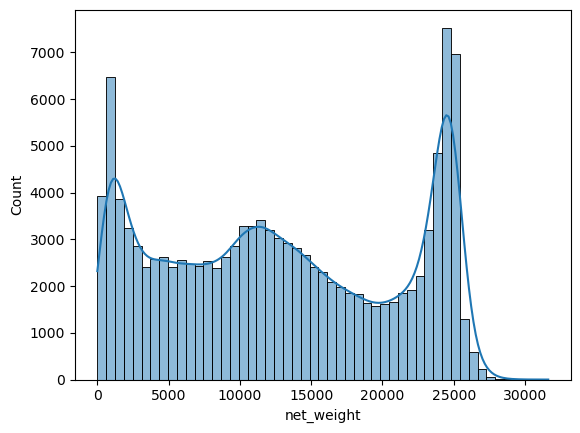

In [83]:
# histogram to understand distrobution of numerical data

# for i in receivals.select_dtypes(include='number').columns:
#     sns.histplot(data=receivals, x=i)
#     plt.show()

# er bare vekt som gir mening å undersøke?:
sns.histplot(data=receivals, x='net_weight', kde=True)
plt.show()

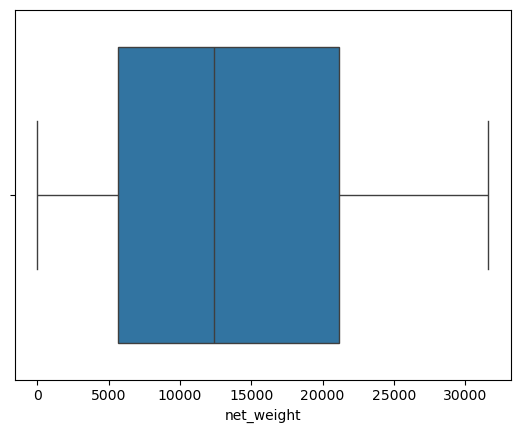

In [84]:
# Box-plot to indentify outliers

# for i in receivals.select_dtypes(include='number').columns:
#     sns.boxplot(data=receivals, x=i)
#     plt.show()

sns.boxplot(data=receivals, x='net_weight')
plt.show()

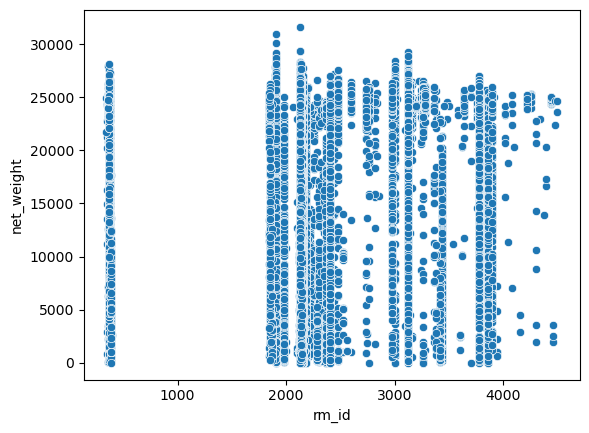

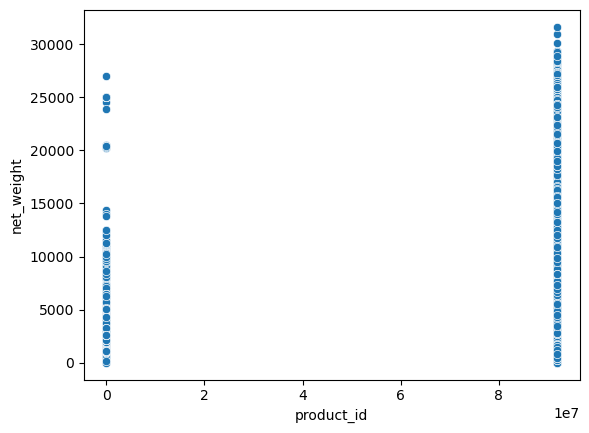

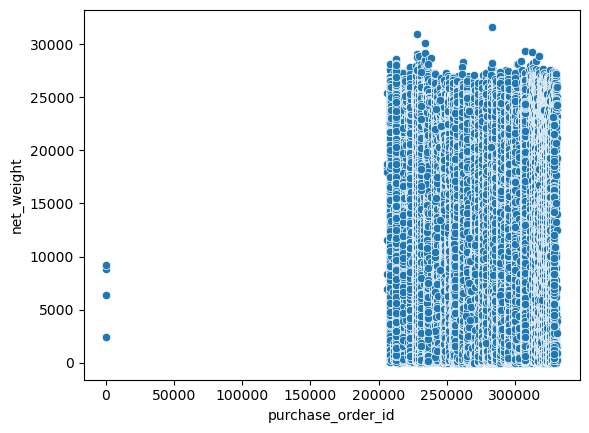

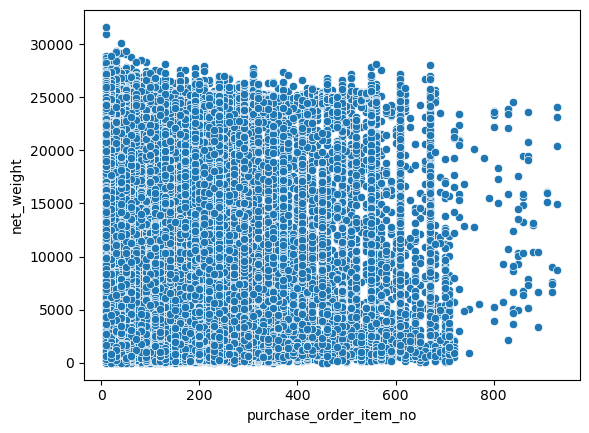

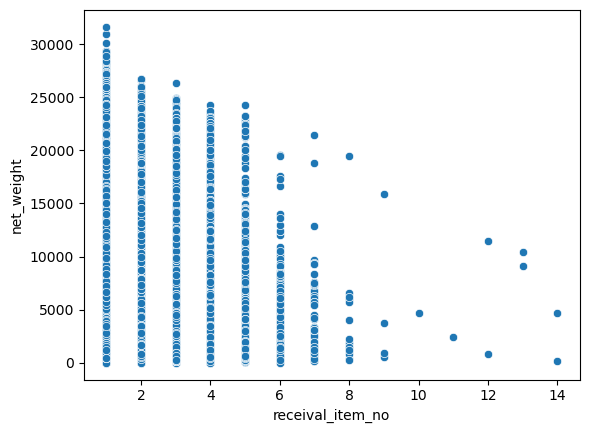

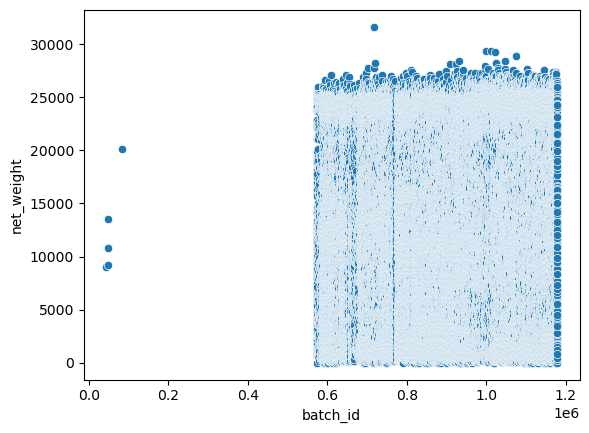

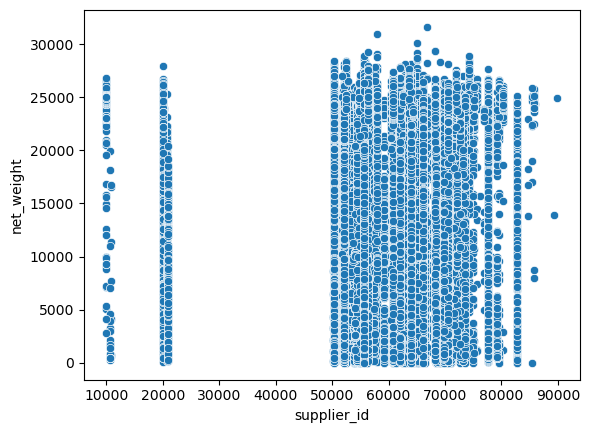

In [85]:
# Scatterplot to understand relationships in the data, remove target variable (net_weight)
for i in ['rm_id', 'product_id', 'purchase_order_id', 'purchase_order_item_no',
       'receival_item_no', 'batch_id', 'supplier_id']:
    sns.scatterplot(data=receivals, x=i, y='net_weight')
    plt.show()

In [86]:
receivals.select_dtypes(include='number').columns

Index(['rm_id', 'product_id', 'purchase_order_id', 'purchase_order_item_no',
       'receival_item_no', 'batch_id', 'net_weight', 'supplier_id'],
      dtype='object')

In [87]:
# correlation with heatmap to interpret the relation and multicollinarity 
s=receivals.select_dtypes(include='number').corr()

<Axes: >

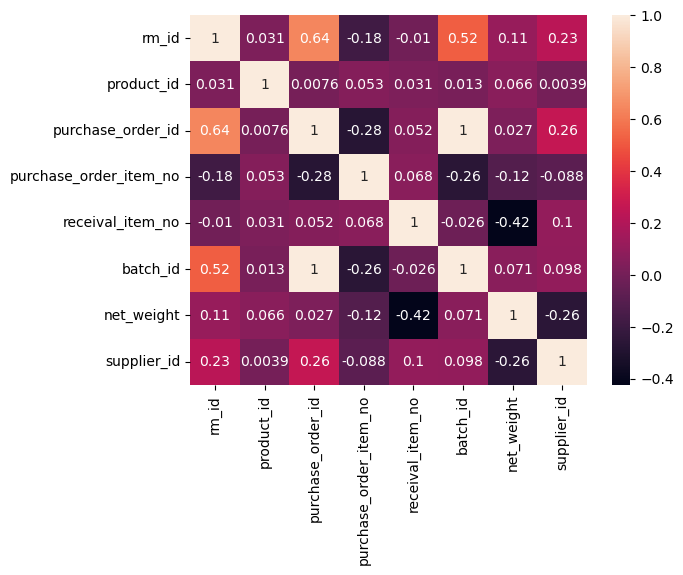

In [88]:
sns.heatmap(s, annot=True)

2.2 -> FORMATTERER ID-KOLONNER SOM KATEGORISKE VARIABLER, SÅNN AT PLOTTINGEN OVER KAN GI MENING!

In [89]:
receivals.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 122590 entries, 0 to 122589
Data columns (total 10 columns):
 #   Column                  Non-Null Count   Dtype  
---  ------                  --------------   -----  
 0   rm_id                   122533 non-null  float64
 1   product_id              122533 non-null  float64
 2   purchase_order_id       122537 non-null  float64
 3   purchase_order_item_no  122537 non-null  float64
 4   receival_item_no        122590 non-null  int64  
 5   batch_id                64765 non-null   float64
 6   date_arrival            122590 non-null  object 
 7   receival_status         122590 non-null  object 
 8   net_weight              122522 non-null  float64
 9   supplier_id             122590 non-null  int64  
dtypes: float64(6), int64(2), object(2)
memory usage: 9.4+ MB


*** Endrer kategoriske variabler til strings, og date_arrival til datetime

In [90]:
for i in receivals.columns:
    if i.endswith("_id") or i.endswith("_no"):
        receivals[i] = receivals[i].astype('string')

In [91]:
receivals['date_arrival'] = pd.to_datetime(receivals['date_arrival'], utc=True, errors='coerce')

## veldig nyttig for å kunne legge til features som måned, år, uke, helg

*** Undersøker med describe():

In [92]:
receivals.describe().T

,count,mean,std,min,25%,50%,75%,max
net_weight,122522.0,12972.566543,8264.652621,0.0,5660.0,12380.0,21120.0,31626.0


In [93]:
receivals.describe(include="object").T

,count,unique,top,freq
receival_status,122590,4,Completed,122448


Checking impossible values:

In [94]:
# weights
(receivals['net_weight'] < 0).any()

np.False_

In [95]:
# dates
receivals['date_arrival'].isna().sum()

np.int64(0)

First EDA step: describe():

In [98]:
receivals.describe(include='string').T

,count,unique,top,freq
rm_id,122533,203,2130.0,23621
product_id,122533,54,91900143.0,62537
purchase_order_id,122537,7173,300251.0,977
purchase_order_item_no,122537,92,10.0,38277
receival_item_no,122590,15,1,87211
batch_id,64765,64765,43903.0,1
supplier_id,122590,255,52036,10754


In [100]:
receivals.describe().T

,count,mean,std,min,25%,50%,75%,max
net_weight,122522.0,12972.566543,8264.652621,0.0,5660.0,12380.0,21120.0,31626.0


In [99]:
receivals.head()

,rm_id,product_id,purchase_order_id,purchase_order_item_no,receival_item_no,batch_id,date_arrival,receival_status,net_weight,supplier_id
0,365.0,91900143.0,208545.0,10.0,1,<NA>,2004-06-15 11:34:00+00:00,Completed,11420.0,52062
1,365.0,91900143.0,208545.0,10.0,2,<NA>,2004-06-15 11:34:00+00:00,Completed,13760.0,52062
2,365.0,91900143.0,208490.0,10.0,1,<NA>,2004-06-15 11:38:00+00:00,Completed,11281.0,50468
3,365.0,91900143.0,208490.0,10.0,2,<NA>,2004-06-15 11:38:00+00:00,Completed,13083.0,50468
4,379.0,91900296.0,210435.0,20.0,1,<NA>,2004-06-15 11:40:00+00:00,Completed,23910.0,52577


3. Missing value treatments

categorical variable: mode

descrete variable: mode

continous variable: mean, median

*** do not treat target variable

In [96]:
# choose method of imputing missing value
#like mean, median, mode or KNNImputer

In [97]:
receivals.isnull().sum()

rm_id                        57
product_id                   57
purchase_order_id            53
purchase_order_item_no       53
receival_item_no              0
batch_id                  57825
date_arrival                  0
receival_status               0
net_weight                   68
supplier_id                   0
dtype: int64